In [71]:
import json

with open('aapl6m.json') as hist_price_json:
    data = json.load(hist_price_json)
    hist_price = [p['close'] for p in data]


In [72]:
hist_price

[216.1951,
 216.5523,
 216.6813,
 218.3285,
 215.9768,
 219.0826,
 220.4718,
 218.7155,
 223.2104,
 223.9943,
 225.5026,
 227.5069,
 230.2754,
 226.2269,
 222.5555,
 222.0396,
 225.1156,
 214.6869,
 212.7916,
 220.3924,
 215.6791,
 220.4321,
 219.4795,
 214.3495,
 217.614,
 218.9437,
 221.0076,
 213.4267,
 218.1003,
 214.6273,
 210.5987,
 211.6505,
 217.1675,
 220.5015,
 205.8755,
 200.0311,
 202.1942,
 208.3264,
 207.5995,
 203.5967,
 193.3407,
 191.409,
 186.0022,
 190.5925,
 192.7034,
 185.0662,
 176.2241,
 176.025,
 171.5541,
 173.8742,
 173.4958,
 180.1672,
 178.7831,
 177.8173,
 184.0306,
 175.9354,
 173.9738,
 167.7704,
 168.8756,
 167.9098,
 168.3778,
 170.2199,
 164.7732,
 163.2398,
 165.3607,
 160.2028,
 156.1602,
 150.0862,
 146.2029,
 156.4987,
 155.4831,
 155.5627,
 157.0663,
 157.2455,
 141.5827,
 147.6268,
 147.2982,
 150.1061,
 152.6552,
 153.1431,
 151.6396,
 149.3594,
 152.4162,
 154.2783,
 155.1943,
 156.1502,
 152.6453,
 153.2626,
 152.0478,
 157.0862,
 155.6324,
 1

(array([ 1.,  6.,  9., 10.,  2.,  7., 16., 18.,  5.,  4., 10.,  7.,  3.,
         3.,  2.,  3., 10., 13.,  6.,  3.]),
 array([141.5827  , 146.017335, 150.45197 , 154.886605, 159.32124 ,
        163.755875, 168.19051 , 172.625145, 177.05978 , 181.494415,
        185.92905 , 190.363685, 194.79832 , 199.232955, 203.66759 ,
        208.102225, 212.53686 , 216.971495, 221.40613 , 225.840765,
        230.2754  ]),
 <a list of 20 Patch objects>)

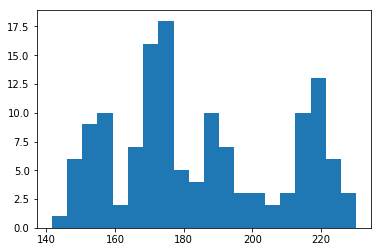

In [73]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.hist(hist_price, 20)

In [74]:
# fit log normal distribution
import numpy as np
from scipy.stats import lognorm

estimated_sigma, loc, scale = lognorm.fit(hist_price)

print(estimated_sigma)
print(scale)
print(loc)

0.29656455479292676
79.29017943599274
101.55871117243439


In [75]:
rand_data = lognorm.rvs(estimated_sigma, loc, scale, size=130)

rand_data = [x for x in rand_data if x > 68 and x < 250]


In [107]:
np.exp(estimated_sigma)

1.3452293981995502

(array([ 7.,  3.,  9.,  4.,  8., 14., 18., 14.,  8., 13.,  9.,  6.,  8.,
         1.,  1.,  0.,  1.,  0.,  1.,  3.]),
 array([144.50256506, 149.77106387, 155.03956267, 160.30806148,
        165.57656028, 170.84505909, 176.11355789, 181.3820567 ,
        186.6505555 , 191.91905431, 197.18755311, 202.45605192,
        207.72455072, 212.99304953, 218.26154833, 223.53004714,
        228.79854594, 234.06704475, 239.33554355, 244.60404236,
        249.87254116]),
 <a list of 20 Patch objects>)

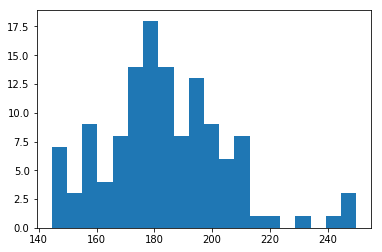

In [76]:
plt.hist(rand_data, 20)

([array([ 5.,  4.,  6.,  6.,  5., 12., 21., 12., 13., 12.,  9.,  6., 10.,
          1.,  0.,  1.,  1.,  0.,  1.,  3.]),
  array([ 2.,  7., 17.,  2.,  8., 23., 13.,  5., 11., 10.,  1.,  3.,  4.,
         11., 14.,  6.,  1.,  0.,  0.,  0.])],
 array([141.5827    , 146.99719206, 152.41168412, 157.82617617,
        163.24066823, 168.65516029, 174.06965235, 179.48414441,
        184.89863647, 190.31312852, 195.72762058, 201.14211264,
        206.5566047 , 211.97109676, 217.38558881, 222.80008087,
        228.21457293, 233.62906499, 239.04355705, 244.4580491 ,
        249.87254116]),
 <a list of 2 Lists of Patches objects>)

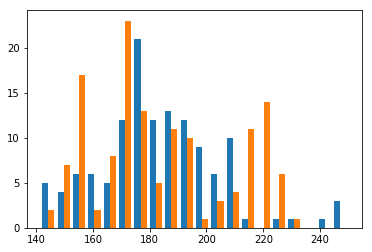

In [77]:
plt.hist([rand_data, hist_price], 20)



In [103]:
import  math
from scipy.stats import norm

def cdf(z, mu=0.0, sigma=1.0):
    return Phi((z-mu)/sigma)

def get_bs_call_price(s, x, r, sigma, t):
    a = (math.log(s/x) + (r+sigma*sigma/2.0)*t) / (sigma * math.sqrt(t))
    b = a - sigma*math.sqrt(t)
    return s*cdf(a) - x*math.exp(-r*t)*cdf(b)

In [115]:
get_bs_call_price(196, 200, 0.025, 0.2, 0.5)

10.35026572078145

In [ ]:
get_bs_call_price(196, 200, 0.025, 0.2, 0.5)

In [93]:
# find implied valolity


20.541770533015566

In [117]:
np.exp(0.2)

1.2214027581601699